<a href="https://colab.research.google.com/github/U-ohata/Rabbit_Report_2/blob/Rabbit_Report_Colaboratory/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k近傍法

In [38]:
#numpyと、乳がんのデータセット読み込み
import numpy as np
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame
import pandas as pd
#canser変数にデータ読み込み
canser = load_breast_cancer()
#canserデータをデータフレームに変換
df = DataFrame(data=canser.data, columns = canser.feature_names)

In [50]:
#kNNモデルインポート
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)

In [10]:
#描画ファイルインポート
import matplotlib.pyplot as plot

In [11]:
#データフレームに良性か悪性かを追加
df['TARGET']=np.array(canser.target)

In [23]:
#項目名表示
print(canser['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [30]:
#mean radius列のみxに抽出
x = df.loc[:, 'mean radius'].values
#mean compactnessのみyに抽出
y = df.loc[:, 'mean compactness'].values
#TARGETのみtagに抽出
tag = df.loc[:, ['TARGET']].values

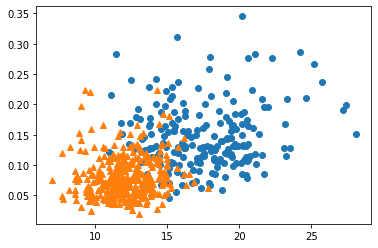

In [51]:
#ターゲットの値ごとにデータを分ける
x_0 = []
x_1 = []
y_0 = []
y_1 = []
for i in range(len(x)):
  if tag[i] == 0:
    x_0.append(x[i])
    y_0.append(y[i])
  else:
    x_1.append(x[i])
    y_1.append(y[i])

#点で描画
plot.plot(x_0,y_0,'o')
plot.plot(x_1,y_1,'^')
#plot.plot(x,y,'^')

In [32]:
#2次元データ作成
list = np.stack([x,y],1)

In [52]:
#モデル学習
model.fit(list, tag)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

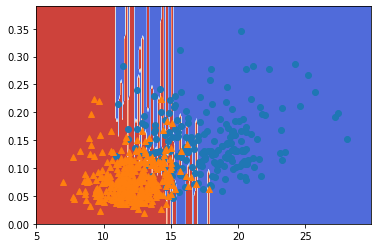

In [54]:
#グリッド作成
grid_line_x = np.arange(5, 30, 0.1)
grid_line_y = np.arange(0, 0.4, 0.01)
grid_x, grid_y = np.meshgrid(grid_line_x, grid_line_y)

grid_z = model.predict(np.array([X.ravel(), Y.ravel()]).T)
grid_z = grid_z.reshape(grid_x.shape)

# データプロットする。
plot.contourf(grid_x, grid_y, grid_z, cmap='coolwarm')

#点で描画
plot.plot(x_0,y_0,'o')
plot.plot(x_1,y_1,'^')